  1. Importando as bibliotecas necessárias

---



In [ ]:
!pip install networkx

In [ ]:
# importando libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

2. Importando datasets THOR com dados da guerra do Vietnã

In [ ]:
bombing_operation = pd.read_csv("../input/THOR_Vietnam_Bombing_Operations.csv")
aircraft_glossary = pd.read_csv("../input/THOR_Vietnam_Aircraft_Glossary.csv", encoding = "ISO-8859-1")
weapons_glossary = pd.read_csv("../input/THOR_Vietnam_Weapons_Glossary.csv", encoding = "ISO-8859-1")

3. Resumindo o conjuntos de dados




In [ ]:
print("/// Conjunto de dados ///")
print("operacoes com bombas : ",bombing_operation.shape)
print("glossario de avioes : ",aircraft_glossary.shape)
print("glossario de armas : ",weapons_glossary.shape)

/// Conjunto de dados ///

operacoes com bombas :  *(4670416, 47)*

glossario de aviões :  *(104, 8)*

glossario de armas :  *(294, 6)*

In [ ]:
bombing_operation.head(2)

In [ ]:
aircraft_glossary.head(2)

In [ ]:
weapons_glossary.head(2)

4. Para a visualização dos dados: nação com o maior número de missões.

In [ ]:
countries_mission = bombing_operation["COUNTRYFLYINGMISSION"]
count = countries_mission.value_counts()
countries, y = count.keys().tolist(), count.values

plt.figure(figsize=(15,10))
ax= sns.barplot(x=countries, y=y,palette = sns.cubehelix_palette(len(countries)))
plt.xlabel('Countries')
plt.ylabel('Number of mission')
plt.title('Number of mission by country')

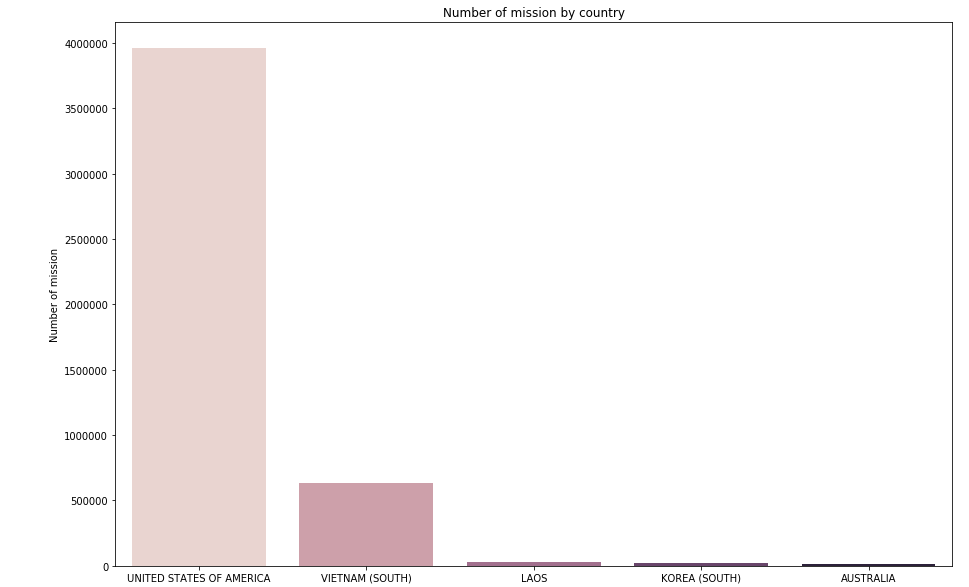

5. localização onde as missões foram realizadas:

In [ ]:
mission_lat_lon = bombing_operation[['COUNTRYFLYINGMISSION', 'TGTLATDD_DDD_WGS84', 'TGTLONDDD_DDD_WGS84']]
mission_lat_lon = mission_lat_lon.rename(columns={"COUNTRYFLYINGMISSION": "country", "TGTLATDD_DDD_WGS84": "latitude", "TGTLONDDD_DDD_WGS84" : "longitude"})
mission_lat_lon = mission_lat_lon[pd.notnull(mission_lat_lon['latitude'])]
mission_lat_lon = mission_lat_lon[pd.notnull(mission_lat_lon['country'])]
print(mission_lat_lon.head())

                     country   latitude   longitude

3   UNITED STATES OF AMERICA  16.902500  106.014166

4            VIETNAM (SOUTH)  14.945555  108.257222

5   UNITED STATES OF AMERICA  19.602222  103.597222

6   UNITED STATES OF AMERICA  14.573611  106.689722

15  UNITED STATES OF AMERICA  17.563611  105.756666

6. Arredondando e eliminando linhas duplicadas

In [ ]:
mission_lat_lon['latitude'] = mission_lat_lon['latitude'].round(2)
mission_lat_lon['longitude'] = mission_lat_lon['longitude'].round(2)
print("BEFORE DROP DUPLICATES : ",mission_lat_lon.shape)
mission_lat_lon = mission_lat_lon.drop_duplicates()
print("AFTER DROP DUPLICATES : ",mission_lat_lon.shape)

BEFORE DROP DUPLICATES :  (3540263, 3)

AFTER DROP DUPLICATES :  (246561, 3)

7. Atribuindo cores, o vermelho será uma representação dos Estados Unidos e os demais paises estarão em azul

In [ ]:
col = {}
for c in countries:
    if c == 'UNITED STATES OF AMERICA':
        col[c] = 'red'
    else:
        col[c] = 'blue'

mission_lat_lon['colors'] = [col[c] for c in mission_lat_lon['country'].values]

8. Adicionando o mapa ao escopo

In [ ]:
fig = plt.figure(figsize=(15, 10))
m = Basemap(projection='lcc', resolution='h',
            width=5E6, height=5E6,
            lat_0=16, lon_0=100)
m.etopo(scale=0.5, alpha=0.5)
m.drawcountries()
m.drawcoastlines()

lon = mission_lat_lon['longitude'].values
lat = mission_lat_lon['latitude'].values
col = mission_lat_lon['colors'].values

#Map (long, lat) to (x, y) for plotting
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = 'o', color=col, s=1)
plt.show()

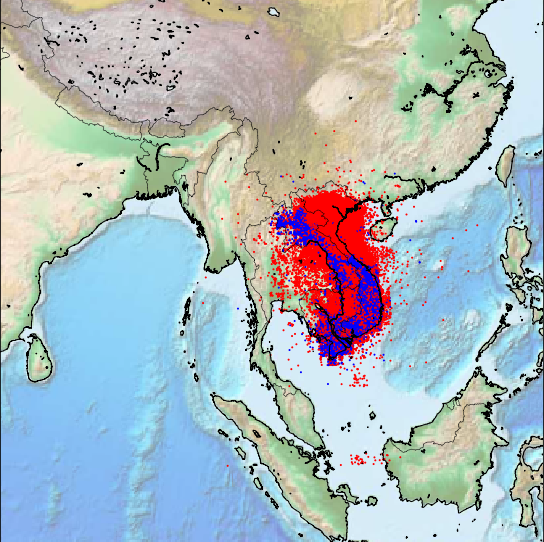

A-) --- Executando arquivos pivys ---

# Network Elements from Vietnam war.

*   Node: Operações de bombardeio.
*   Edge: Missão do país